In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("USD_EGP Historical Data1.csv")

print(df.head())

print(df.describe())

print(df.shape)

print(df.info())

         Date    Price     Open     High      Low Change %
0  2023-08-28  30.9036  30.9163  30.9563  30.8382    0.50%
1  2023-08-27  30.7500  30.9499  30.9499  30.8000   -0.48%
2  2023-08-25  30.8990  30.9005  30.9127  30.8819    0.16%
3  2023-08-24  30.8500  30.9000  30.9499  30.8000    0.00%
4  2023-08-23  30.8500  30.8000  30.9499  30.8000    0.00%
             Price         Open         High          Low
count  9870.000000  9870.000000  9870.000000  9870.000000
mean      7.808913     7.808044     7.832299     7.793293
std       5.667261     5.666601     5.694827     5.648231
min       2.689200     2.689200     2.689200     2.689200
25%       3.785925     3.780000     3.840325     3.758800
50%       5.763450     5.765000     5.770000     5.766800
75%       7.630000     7.630000     7.630000     7.625000
max      30.963200    30.955500    32.200000    30.933400
(9870, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9870 entries, 0 to 9869
Data columns (total 6 columns):
 #   Col

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
print(df.describe(include='all').T
)
print(df.nunique())

df['Date'] = pd.to_datetime(df['Date']) 
df['Change %'] = df['Change %'].str.replace('%', '').astype(float) / 100 

print(df.describe())





           count                           mean                  min  \
Date        9870  2008-01-23 09:01:25.349544192  1990-05-31 00:00:00   
Price     9870.0                       6.839031               2.6892   
Open      9870.0                       6.839916               2.6892   
High      9870.0                       6.830177               2.6892   
Low       9870.0                        6.83946               2.6892   
Change %  9870.0                       0.029402                -0.95   

                          25%                  50%                  75%  \
Date      2000-11-14 06:00:00  2008-08-05 12:00:00  2015-05-08 18:00:00   
Price                3.785925              5.76345                 7.63   
Open                     3.78                5.765                 7.63   
High                 3.840325                 5.77                 7.63   
Low                    3.7588               5.7668                7.625   
Change %                 -0.2                

AttributeError: Can only use .str accessor with string values!

In [5]:

print(df.info())  # Check for null values
print(df.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9870 entries, 0 to 9869
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9870 non-null   datetime64[ns]
 1   Price     9870 non-null   float64       
 2   Open      9870 non-null   float64       
 3   High      9870 non-null   float64       
 4   Low       9870 non-null   float64       
 5   Change %  9870 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 462.8 KB
None
                                Date        Price         Open         High  \
count                           9870  9870.000000  9870.000000  9870.000000   
mean   2008-01-23 09:01:25.349544192     7.808913     7.808044     7.832299   
min              1990-05-31 00:00:00     2.689200     2.689200     2.689200   
25%              2000-11-14 06:00:00     3.785925     3.780000     3.840325   
50%              2008-08-05 12:00:00     5.763450     5.765000   

In [6]:
print(df.isnull().sum().sum())
print(df.duplicated().sum())

0
0


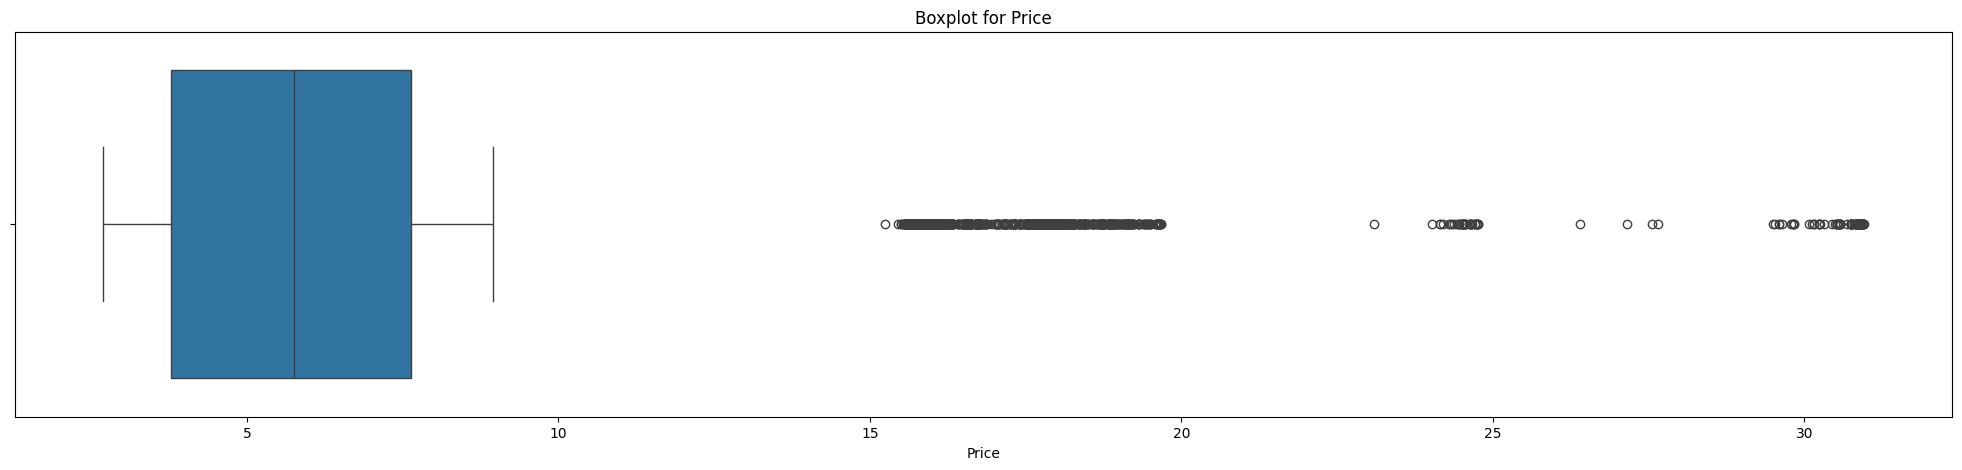

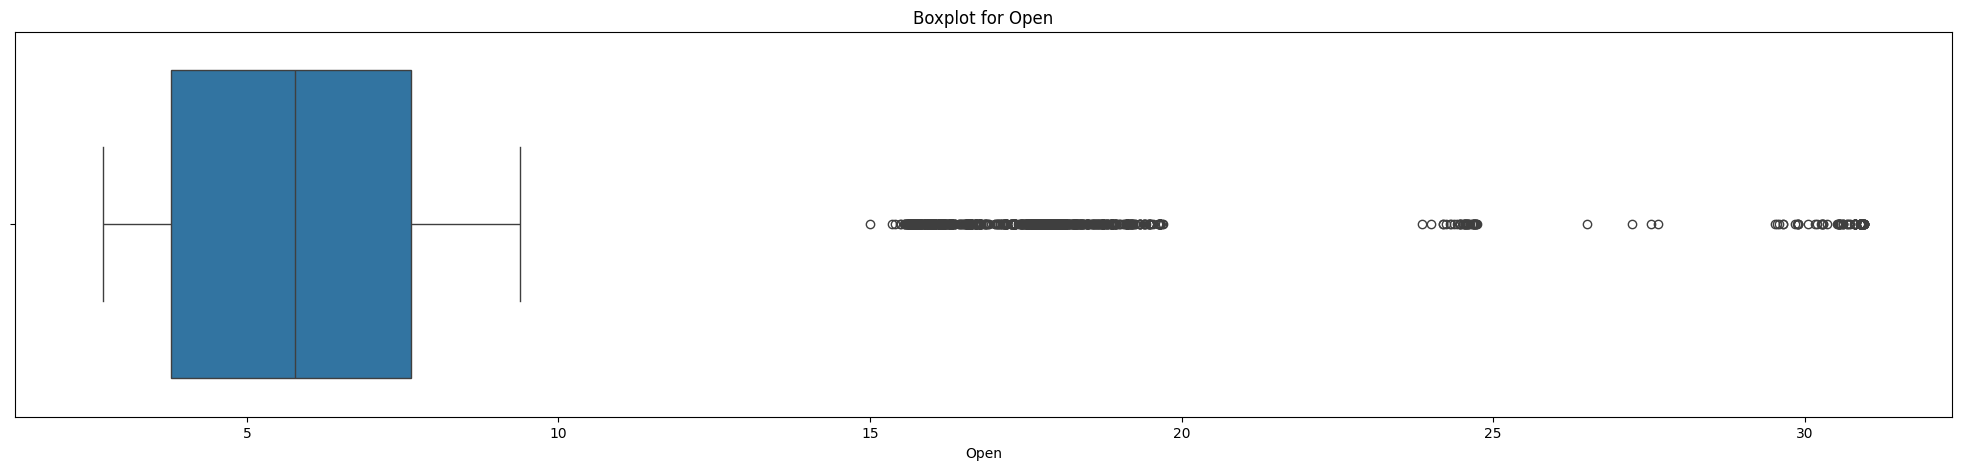

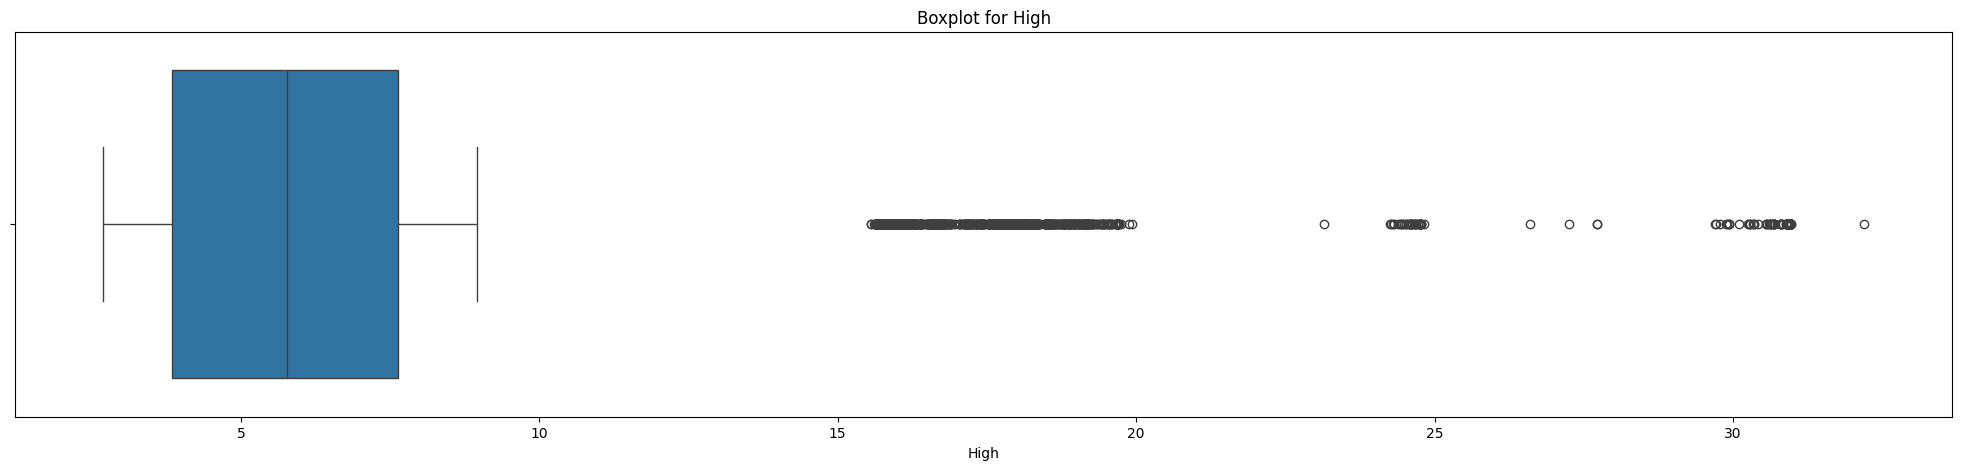

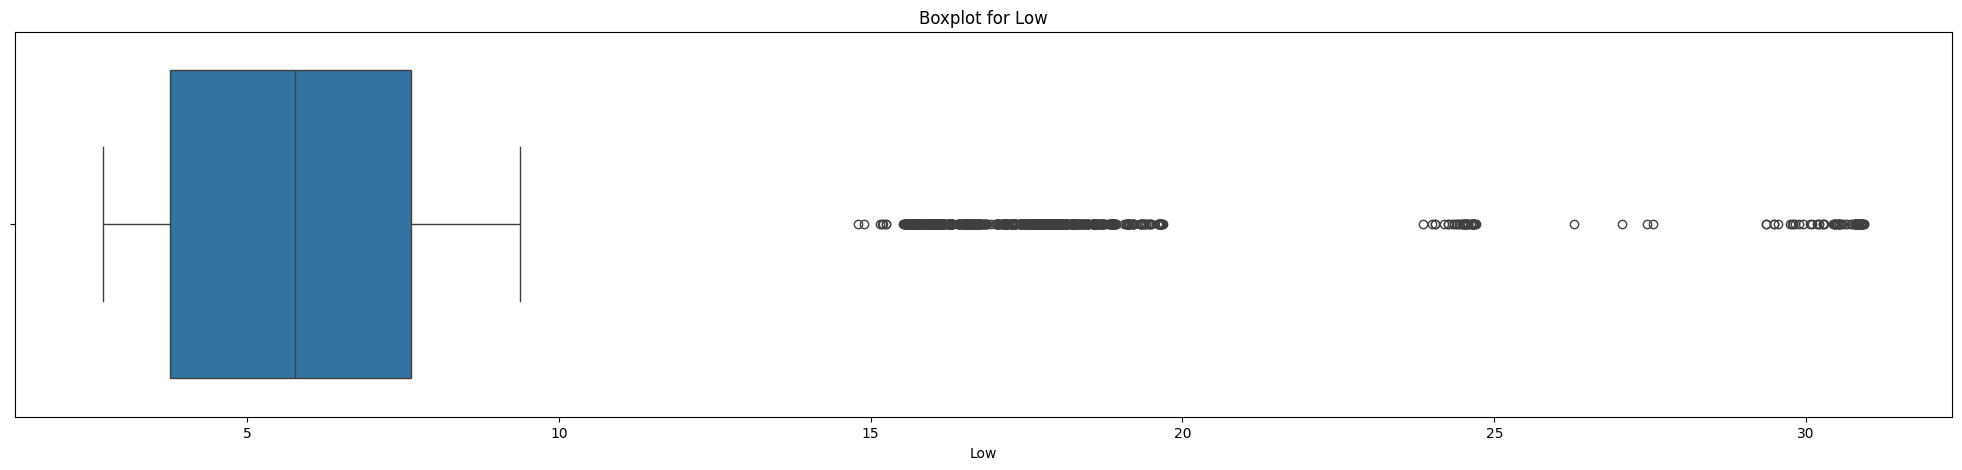

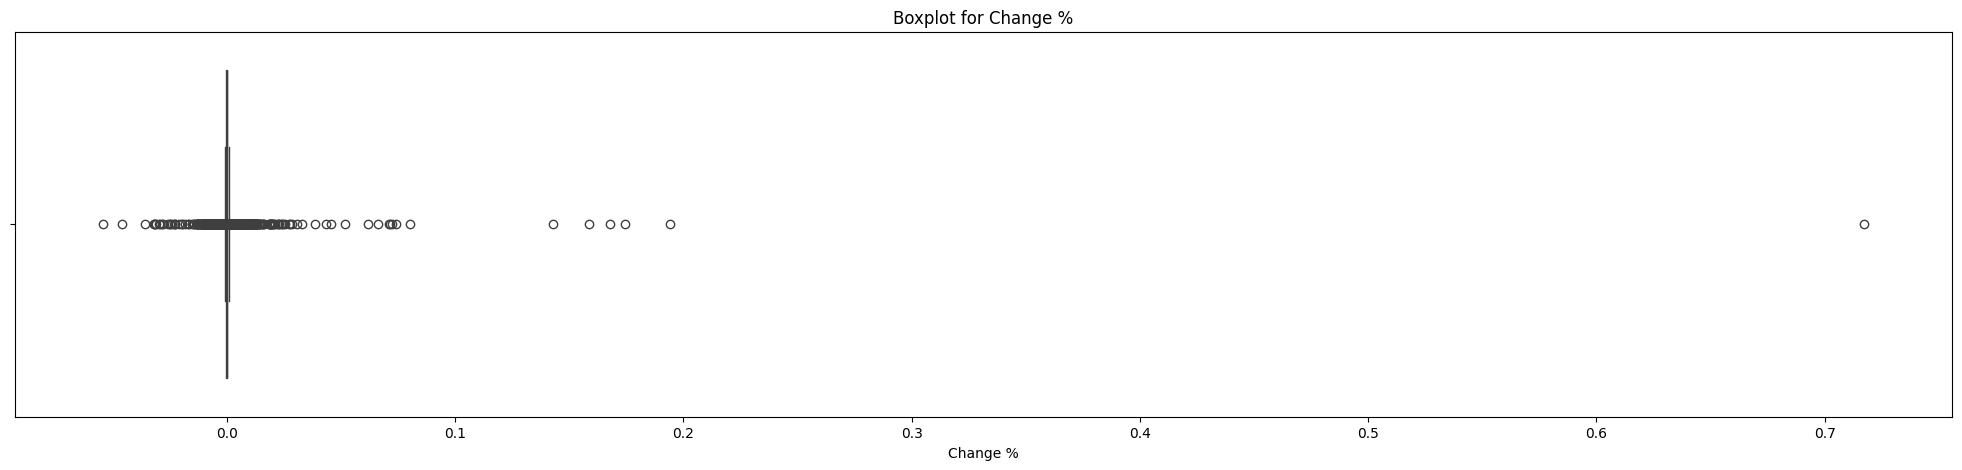

In [7]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Iterate over numeric columns and create boxplots
for col in numeric_columns:
    plt.figure(figsize=(25, 5))  # Set the figure size
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [8]:
print(df.head(100).to_string)

has_negatives = (df['Price'] < 0).any()
print(has_negatives)

<bound method DataFrame.to_string of          Date    Price     Open     High      Low  Change %
0  2023-08-28  30.9036  30.9163  30.9563  30.8382    0.0050
1  2023-08-27  30.7500  30.9499  30.9499  30.8000   -0.0048
2  2023-08-25  30.8990  30.9005  30.9127  30.8819    0.0016
3  2023-08-24  30.8500  30.9000  30.9499  30.8000    0.0000
4  2023-08-23  30.8500  30.8000  30.9499  30.8000    0.0000
..        ...      ...      ...      ...      ...       ...
95 2023-04-24  30.8500  30.9000  30.9000  30.9000    0.0000
96 2023-04-19  30.8500  30.9163  30.9499  30.8000    0.0000
97 2023-04-18  30.8500  30.9000  30.9499  30.8000    0.0000
98 2023-04-13  30.8500  30.9100  30.9499  30.8000    0.0000
99 2023-04-12  30.8500  30.9000  30.9499  30.8000    0.0033

[100 rows x 6 columns]>
False


In [9]:
def cap_outliers_iqr(df, cols):
    df_capped = df.copy()
    
    for col in cols:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
        
        if pd.api.types.is_integer_dtype(df[col]):
            df_capped[col] = df_capped[col].astype(int)
    
    return df_capped[cols]  # Return only the capped columns

cols_to_cap = ['Price', 'Open', 'Low', 'High','Change %']

df[cols_to_cap] = cap_outliers_iqr(df, cols_to_cap)


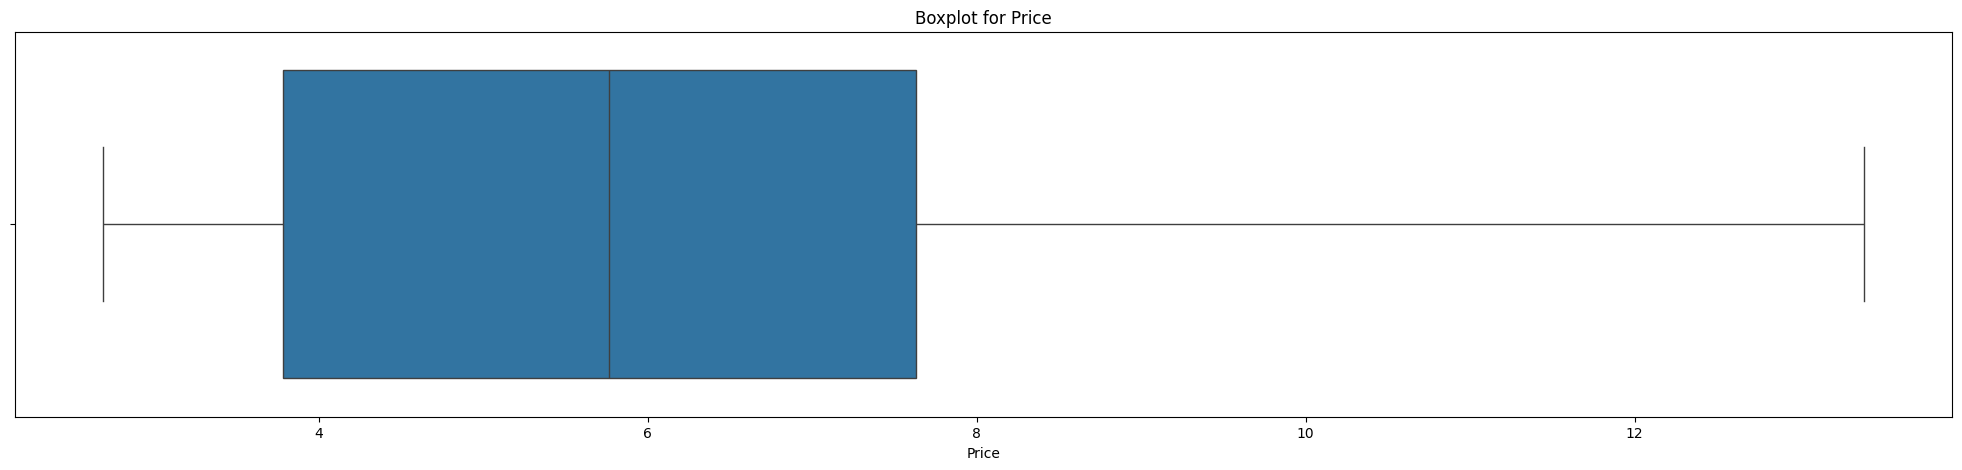

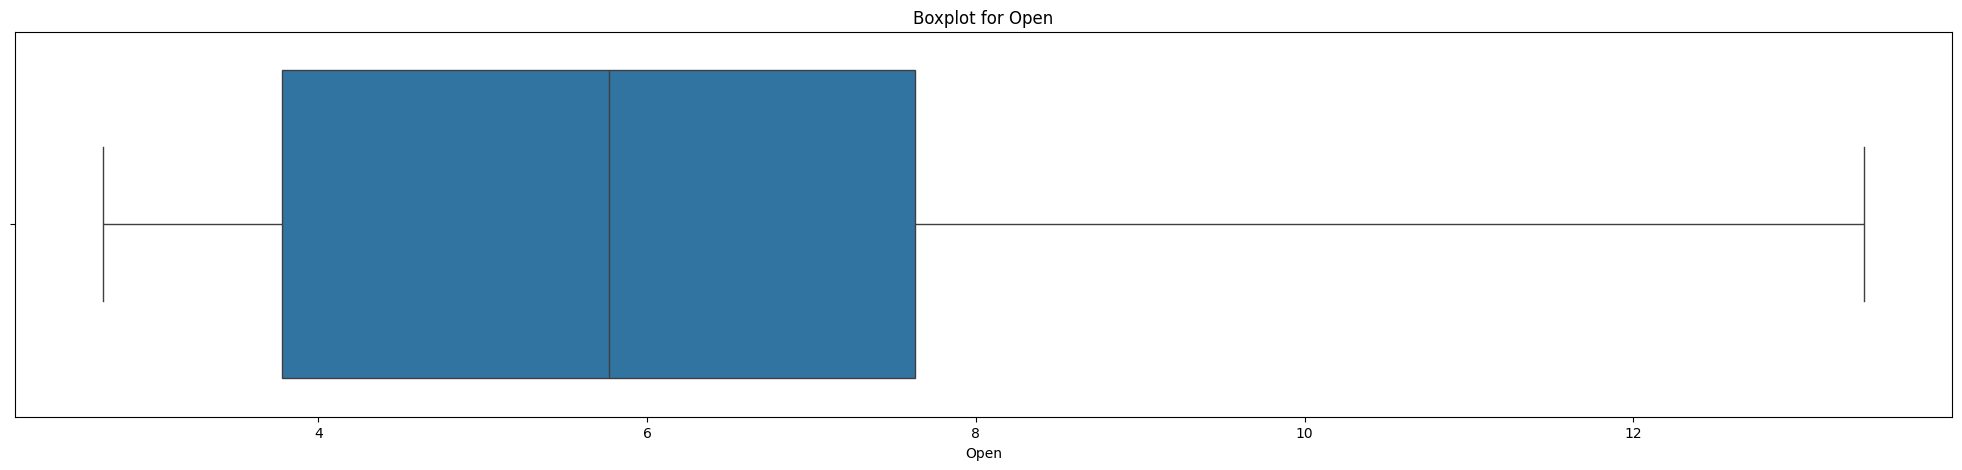

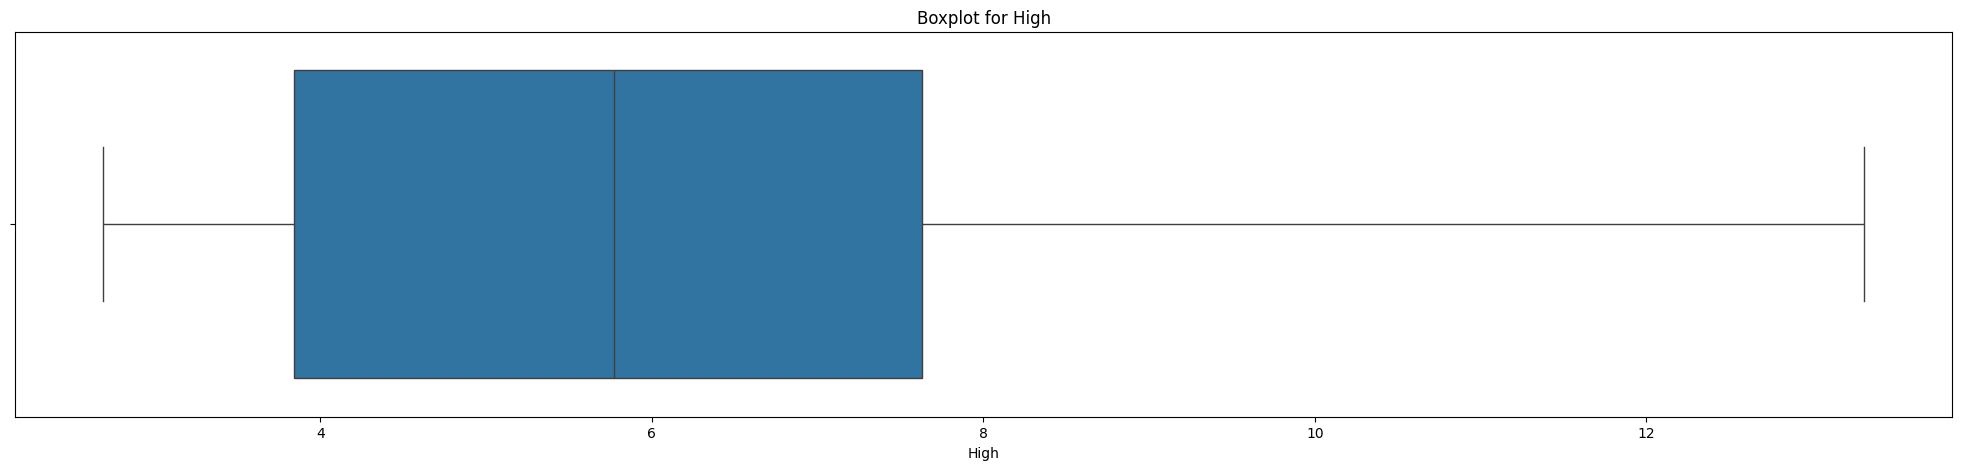

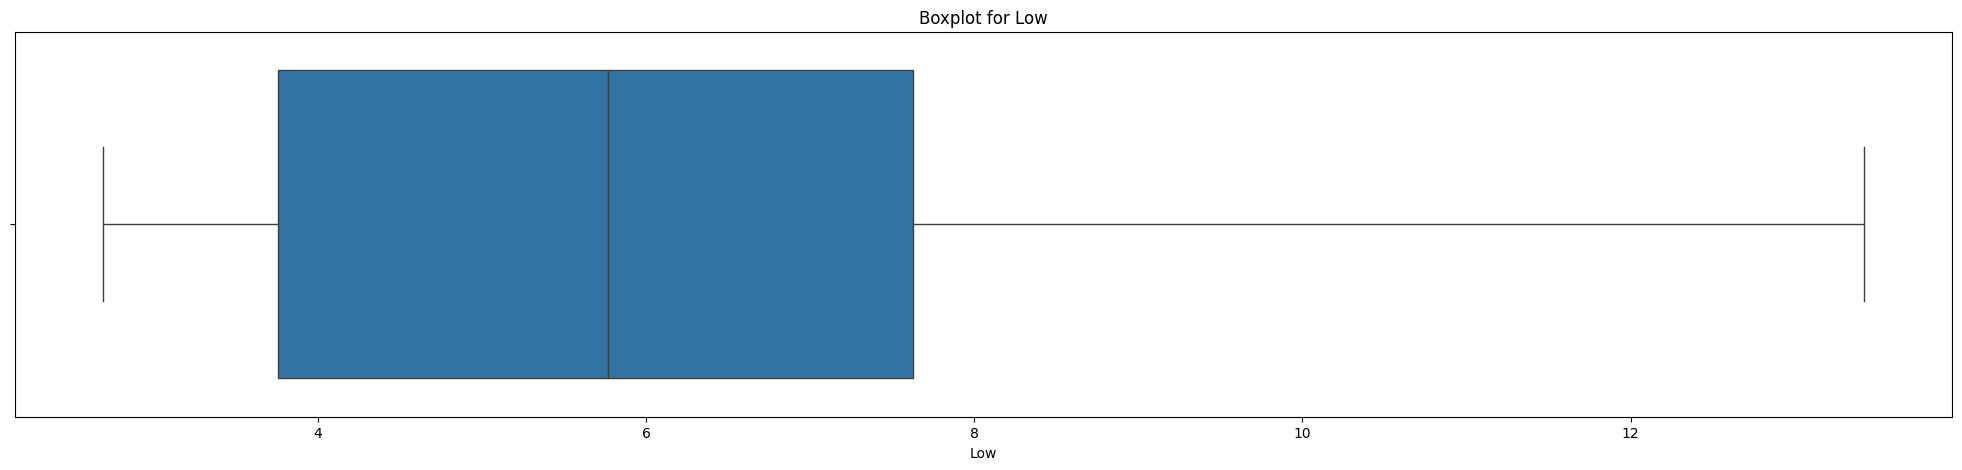

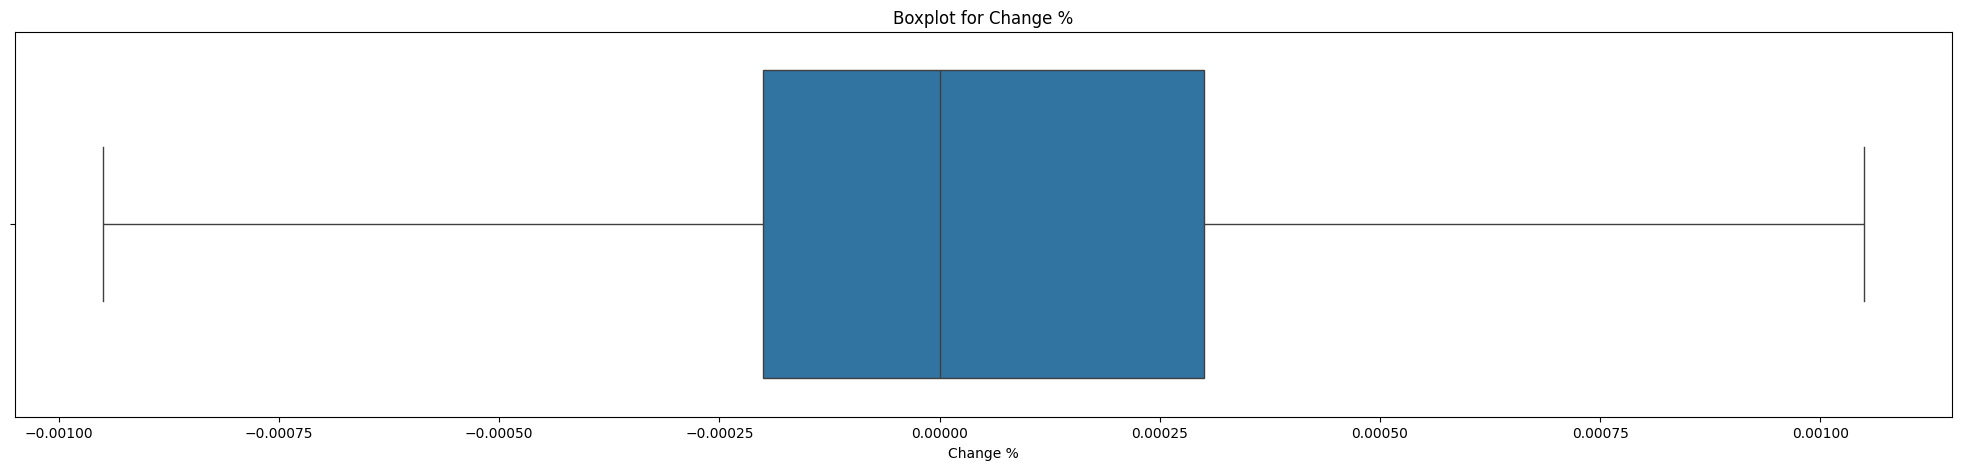

In [10]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Iterate over numeric columns and create boxplots
for col in numeric_columns:
    plt.figure(figsize=(25, 5))  # Set the figure size
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

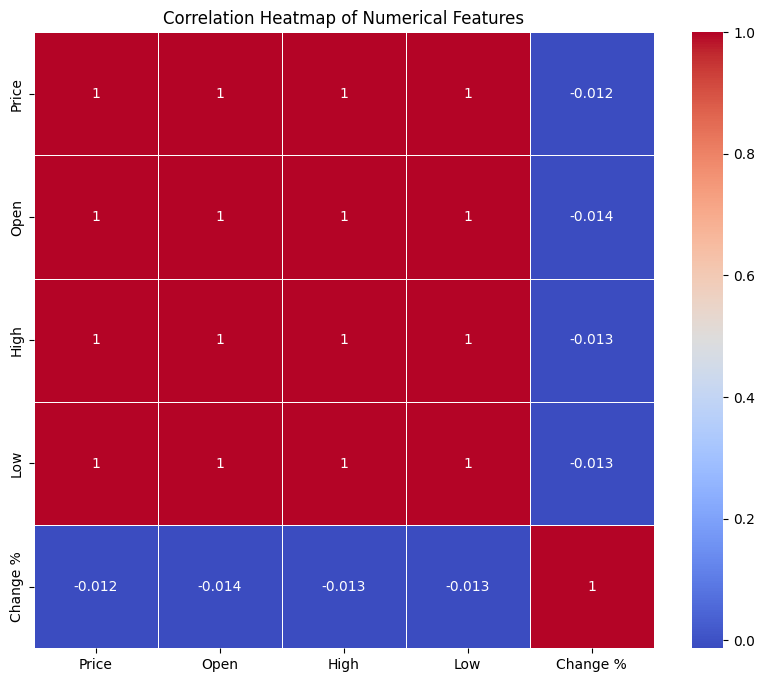

In [11]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))  
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [12]:
cat = list(df.select_dtypes(include=['object']).columns)
print(cat)

print(df[df.duplicated()].shape)

df.nunique()

df.drop_duplicates(inplace=True)
df.info()


[]
(0, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9870 entries, 0 to 9869
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9870 non-null   datetime64[ns]
 1   Price     9870 non-null   float64       
 2   Open      9870 non-null   float64       
 3   High      9870 non-null   float64       
 4   Low       9870 non-null   float64       
 5   Change %  9870 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 462.8 KB


Price
13.396112    1944
7.150100      215
8.880000      209
7.830000      205
4.632500      115
             ... 
5.724200        1
5.716300        1
5.721800        1
5.719200        1
5.778500        1
Name: count, Length: 2038, dtype: int64
Change %
 0.00    4340
 1.05    1392
-0.95    1320
-0.60     219
 0.60     216
-0.10     200
 0.10     189
 0.30     186
 0.40     179
-0.40     176
-0.30     176
-0.20     175
 0.20     164
-0.50     145
 0.70     129
 0.50     113
-0.70     106
 0.80     101
-0.90      99
 0.90      93
-0.80      80
 1.00      72
Name: count, dtype: int64


<Axes: xlabel='Change %', ylabel='Count'>

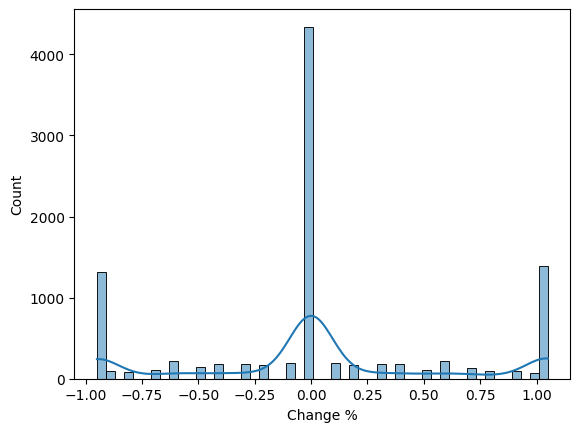

In [24]:
print(df['Price'].value_counts())
print(df['Change %'].value_counts())

sns.histplot(df['Change %'], bins=50, kde=True)

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Open', 'High', 'Low']]  # Use these features for Price prediction
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipelines with hyperparameter grids
pipelines = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', GridSearchCV(estimator=LinearRegression(), param_grid={}))
    ]),
    'Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('model', GridSearchCV(estimator=Ridge(), param_grid={'alpha': [1]}))
    ]),
    'Lasso': Pipeline([
        ('scaler', StandardScaler()),
        ('model', GridSearchCV(estimator=Lasso(), param_grid={'alpha':  [1]}))
    # ]),
    #  'RandomForest': Pipeline([
    #     ('scaler', StandardScaler()),
    #     ('model', GridSearchCV(estimator=RandomForestRegressor(),
    #                           param_grid={
    #                               'n_estimators': [100, 200, 500],
    #                               'min_samples_leaf': [1, 2, 4],
    #                               'max_features': ['auto', 'sqrt', 'log2']
    #                           }))
    ])
}

# Perform grid search and evaluate models
results = {}
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)

    best_model = pipeline.named_steps['model']
    best_params = best_model.best_params_
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {'best_params': best_params, 'mse': mse, 'r2': r2}

# Print results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"R-squared: {result['r2']}")
    print("-" * 20)

Model: Linear Regression
Best Parameters: {}
Mean Squared Error: 0.00023146679253674543
R-squared: 0.9999816148297136
--------------------
Model: Ridge
Best Parameters: {'alpha': 1}
Mean Squared Error: 0.00020769372507179823
R-squared: 0.9999835031001164
--------------------
Model: Lasso
Best Parameters: {'alpha': 1}
Mean Squared Error: 1.0185432270822126
R-squared: 0.9190981545614844
--------------------


Lasso(alpha=1)
    Predicted Price
0         13.596547
1         13.615411
2         13.615411
3         13.615411
4         13.596547
5         13.596547
6         13.615411
7         13.621698
8         13.646850
9         13.646850
10        13.646850
11        13.665713
12        13.640562
13        13.640562
14        13.640562
15        13.672001
16        13.646850
17        13.646850
18        13.646850
19        13.672001
20        13.672001
21        13.672001
22        13.672001
23        13.665713
24        13.665713
25        13.665713
26        13.640562
27        13.640562
28        13.640562
29        13.665713


<Axes: title={'center': 'Predicted Prices for Next Month'}>

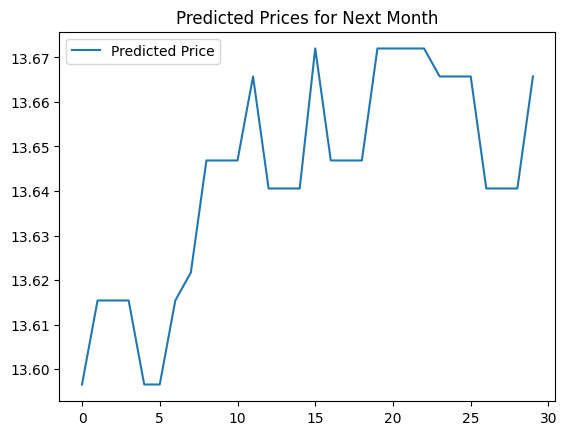

In [15]:
best_model = pipelines['Lasso'].named_steps['model'].best_estimator_
print(best_model)



predicted_prices = []
for day in range(1, 31): 
   
    next_month_features = df[['Open', 'High', 'Low']].iloc[-day-1:-day].values
    predicted_price = best_model.predict(next_month_features)
    predicted_prices.append(predicted_price[0])

predicted_prices_df = pd.DataFrame(predicted_prices, columns=['Predicted Price'])

print(predicted_prices_df)

predicted_prices_df.plot(title='Predicted Prices for Next Month')



Accuracy: 0.5303951367781155
Classification Report:
               precision    recall  f1-score   support

          -1       0.38      0.56      0.46       538
           0       0.72      0.66      0.69       874
           1       0.43      0.30      0.35       562

    accuracy                           0.53      1974
   macro avg       0.51      0.51      0.50      1974
weighted avg       0.55      0.53      0.53      1974



C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pac

    Predicted Change %
0                   -1
1                    0
2                    0
3                    0
4                   -1
5                   -1
6                    0
7                    1
8                    0
9                    0
10                   0
11                   1
12                   0
13                   0
14                   0
15                   0
16                   0
17                   0
18                   0
19                   0
20                   0
21                   0
22                   0
23                   1
24                   1
25                   1
26                   0
27                   0
28                   0
29                   1
Random Forest Results:
Mean Squared Error: 0.37962087809954886
R-squared: -0.09250362411920254


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-pac

    Predicted Change %
0            -0.015771
1             0.178750
2             0.178750
3             0.178750
4            -0.015771
5            -0.015771
6             0.178750
7             0.643688
8             0.014451
9             0.014451
10            0.014451
11            0.303061
12           -0.388395
13           -0.388395
14           -0.388395
15            0.457683
16            0.014451
17            0.014451
18            0.014451
19            0.457683
20            0.457683
21            0.457683
22            0.457683
23            0.303061
24            0.303061
25            0.303061
26           -0.388395
27           -0.388395
28           -0.388395
29            0.303061


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-pac

<Axes: title={'center': 'Predicted Change % for Next Month'}>

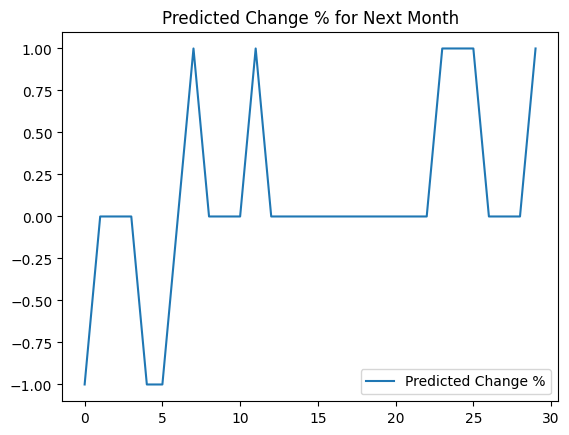

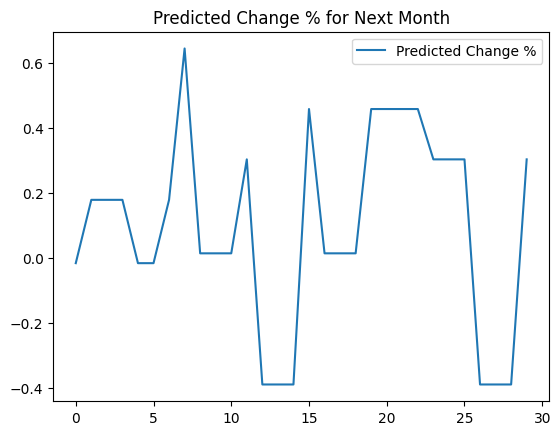

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Preprocess target variable: Clip outliers
df['Change %'] = df['Change %'].clip(lower=-50, upper=50)  # Adjust bounds as needed

# Optional: Log transformation for target
# df['Change %'] = np.log1p(df['Change %'].abs()) * np.sign(df['Change %'])

# Define features and target
X = df[['Open', 'High', 'Low']]
y = df['Change %']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest Regressor with hyperparameter tuning
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10, None],
    'model__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate model
best_rf_pipeline = grid_search.best_estimator_
y_pred = best_rf_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Predict future changes
predicted_changes = []
for day in range(1, 31):
    next_month_features = df[['Open', 'High', 'Low']].iloc[-day-1:-day].values
    predicted_change = best_rf_pipeline.predict(next_month_features)
    predicted_changes.append(predicted_change[0])

predicted_changes_df = pd.DataFrame(predicted_changes, columns=['Predicted Change %'])
print(predicted_changes_df)

predicted_changes_df.plot(title='Predicted Change % for Next Month')


ValueError: All arrays must be of the same length